In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('train_cleaned.csv')


In [5]:
df.shape

(8523, 46)

In [6]:
#Segregating the independent and dependent variables
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']
x.shape,y.shape

((8523, 45), (8523,))

In [7]:
##dividing the data into train and test data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [9]:
#creating an instance of linear regression
lr=LR()

In [10]:
lr.fit(train_x,train_y)
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training Mean Absolute Error',k)

Training Mean Absolute Error 847.1504337048066


In [11]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Testing mean absolute Error',k)

Testing mean absolute Error 804.1992869355433


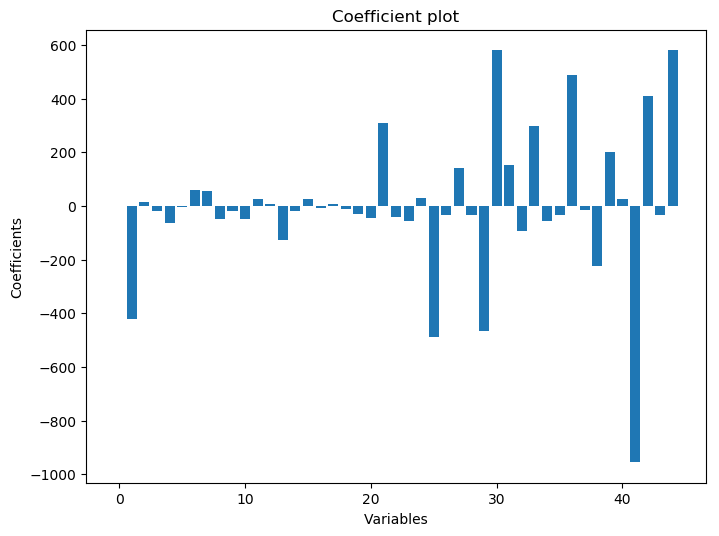

In [12]:
#plotting the coefficients
plt.figure(figsize=(8,6),dpi=100)
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
plt.show()

In [13]:
#checking assumptions of linear regression
error=pd.DataFrame({'fitted values':test_y,'predicted_values':test_predict})

In [14]:
error['residuals']=error['fitted values']-error['predicted_values']
error.head()

,fitted values,predicted_values,residuals
7503,1743.0644,1363.736254,379.328146
2957,356.8688,721.683306,-364.814506
7031,377.5086,885.314916,-507.806316
1084,5778.4782,4239.234147,1539.244053
856,2356.9320,3345.973124,-989.041124


(-4000, 4000)

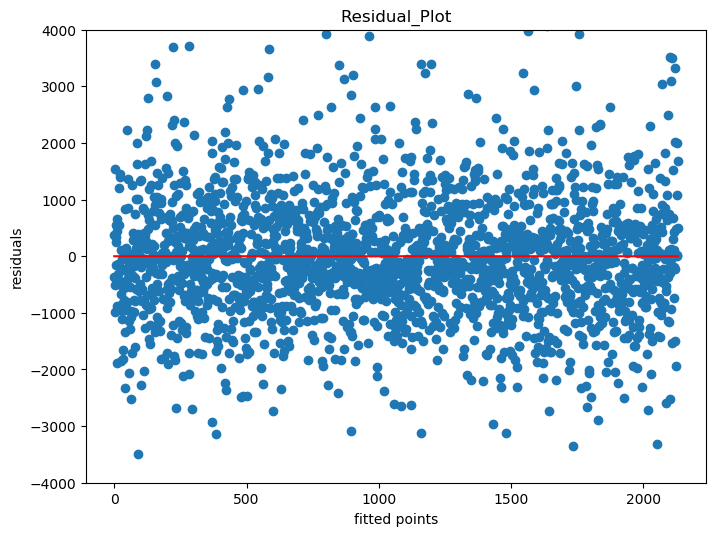

In [15]:
plt.figure(figsize=(8,6),dpi=100,facecolor='w',edgecolor='b')
x=range(0,2131)
y=[0 for i in range(0,2131)]
plt.scatter(x,error.residuals[:],label='residuals')
plt.plot(x,y,color='red',label='regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residual_Plot')
plt.ylim(-4000,4000)

**THINGS TO OBSERVE**
1. constant variance of the residuals 
2. There is no correlation between the residuals

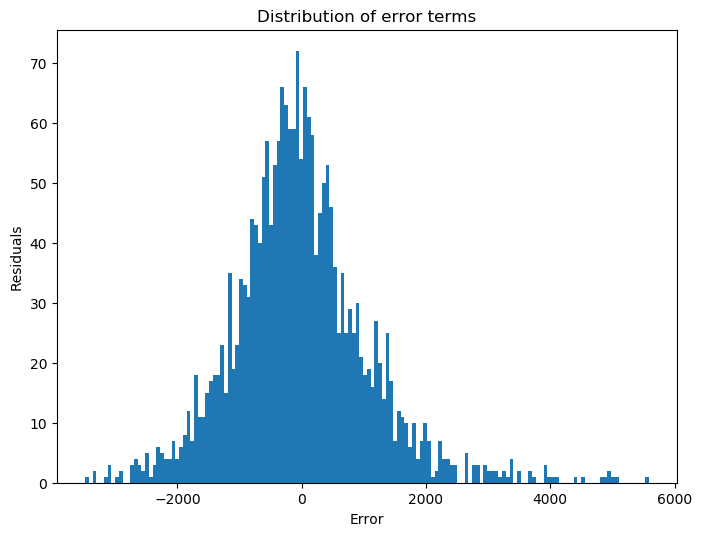

In [16]:
#Checking distribution of residuals
plt.figure(figsize=(8,6),dpi=100,facecolor='w',edgecolor='b')
plt.hist(error.residuals,bins=150)
plt.xlabel('Error')
plt.ylabel('Residuals')
plt.title('Distribution of error terms')
plt.show()

* According to our plot ,the error terms are nearly normally distributed with some outliers at the higher end


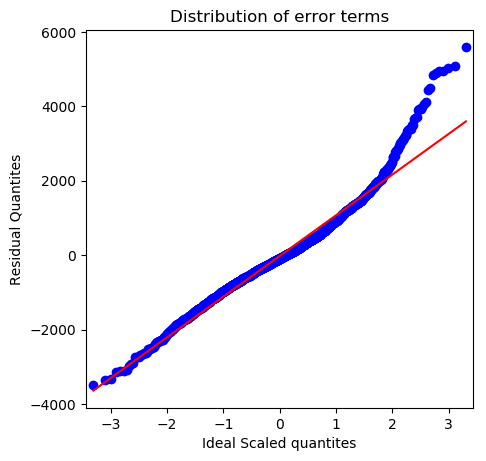

In [17]:
from statsmodels.graphics.gofplots import qqplot

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
qqplot(error.residuals,line='s',ax=ax)
plt.xlabel('Ideal Scaled quantites')
plt.ylabel('Residual Quantites')
plt.title('Distribution of error terms')
plt.show()

* The QQ plot also has the same story that the histrogram told us,the data in mostly normal in nature with some outliers at the high end

In [18]:
#now we will calculate the VIF to check for muilti collinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF=pd.Series([ variance_inflation_factor(df.values,i) for i in range(df.shape[1])],index=df.columns)
VIF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

In [21]:
#from the list we can see that there are no independent variables with VIF>5,so no multicollienarity is exhibited
#VIF however only works with the continuos variables

## Model Interpretability
*Now to interpret the model , we will normalise our data first*

In [24]:
lr=LR(normalize=True)

In [25]:
lr.fit(train_x,train_y)
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training Mean Absolute Error ',k)

Training Mean Absolute Error  856.1757352941178


In [26]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Testing Mean Absolute Error',k)


Testing Mean Absolute Error 813.9464105114969


In [27]:
#Now as we normalised our dataset,we will again plot our graph of our coeeficients and see what changes normalisation brings

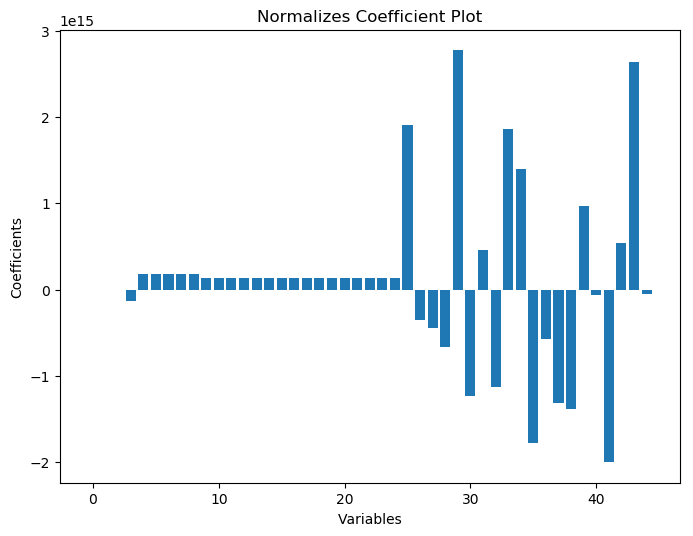

In [29]:
plt.figure(figsize=(8,6),dpi=100,facecolor='w',edgecolor='g')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalizes Coefficient Plot')
plt.show()


In [30]:
#Here we we can see that there are a lot of coeeficients which are near to 0 and not significant .So let us try removing them and build the model again

In [31]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']
x.shape,y.shape

((8523, 45), (8523,))

In [33]:
Coefficients=pd.DataFrame({'Variables':x.columns,'Coefficient':lr.coef_})
Coefficients.head()

,Variables,Coefficient
0,Item_Weight,-1.959817e+00
1,Item_Visibility,-4.349715e+02
2,Item_MRP,1.570824e+01
3,Outlet_Establishment_Year,-1.355688e+14
4,Item_Fat_Content_LF,1.833857e+14


In [34]:
#choosing variables with signifance greater than 0.5(Filtering significant features)
sig_var=Coefficients[Coefficients.Coefficient>0.5]

In [36]:
#Extracting the significant subset do independent Variables
subset=df[sig_var['Variables'].values]
subset.head()

,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT019,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,249.8092,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,48.2692,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,141.6180,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,182.0950,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,53.8614,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
#Importing train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(subset,y,random_state=56)

In [39]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [40]:
lr=LR(normalize=True)
lr.fit(train_x,train_y)
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training Mean Absolute Error',k)

Training Mean Absolute Error 821.7804941802253


In [41]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Testing Mean Absolute Error',k)

Testing Mean Absolute Error 875.0097925856406


Text(0.5,1,'Normalized Coefficient plot')

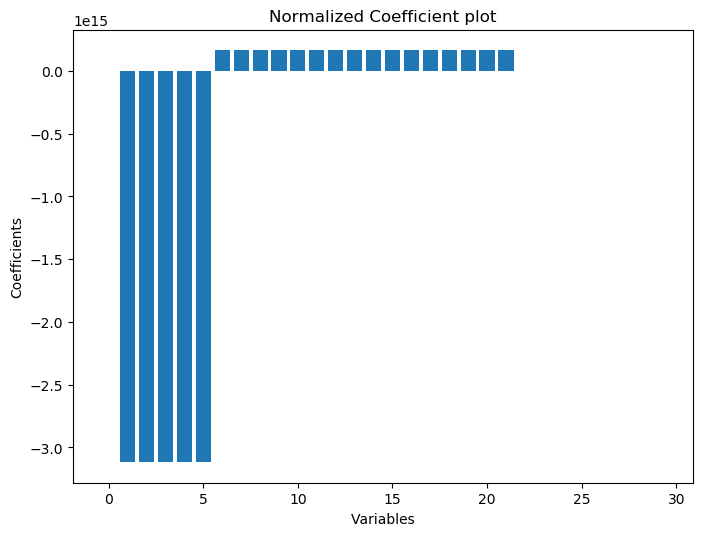

In [43]:
plt.figure(figsize=(8,6),dpi=100,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
